In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [17]:
import pandas as pd
#import pandas_profiling
import numpy as np

import statsmodels.api as sm
import statsmodels.stats as sts
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('data/kc_cleaned_data.csv')

In [3]:
df['bed_bath']=df['bedrooms']+df['bathrooms']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build,years_since_renovated,bed_bath
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,0,0,0.0,4.00
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,1,0,29.0,5.25
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,0,0,0.0,3.00
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,1,0,0.0,7.00
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,0,0,0.0,5.00


In [4]:
outcome = 'price'
x_cols = ['view', 'waterfront', 'has_basement', 'is_cust_build', 'years_since_renovated', 'grade']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     4564.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:55:51   Log-Likelihood:            -2.9855e+05
No. Observations:               21597   AIC:                         5.971e+05
Df Residuals:                   21590   BIC:                         5.972e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8.874e+05   1.16e+04    -76.580      0.000    -9.1e+05   -8.65e+05
view                   7.411e+04   2458.312     30.145      0.000    6.93e+04    7.89e+04
waterfront             6.125e+05    2.2e+04     27.883      0.000    5.69e+05    6.56e+05
has_basement           8.453e+04   3467.739     24.376      0.000    7.77e+04    9.13e+04
is_cust_build          8.873e+05   2.52e+04     35.269      0.000    8.38e+05    9.37e+05
years_since_renovated  3877.6340    317.566     12.210      0.000    3255.181    4500.088
grade                  1.784e+05   1506.434    118.434      0.000    1.75e+05    1.81e+05
==============================================================================
Omnibus:                    15952.841   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1001968.297
Skew:                           2.972   Prob(JB):                         0.00
Kurtosis:                      35.835   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('view', 1.3507565775678645),
 ('waterfront', 1.1835839873596314),
 ('has_basement', 1.6636772912133575),
 ('is_cust_build', 1.0263826597148695),
 ('years_since_renovated', 1.0342041245382976),
 ('grade', 1.6963546479999723)]

# Code

In [8]:
y = df['price']
X = df[['view', 'waterfront', 'has_basement', 'is_cust_build', 'years_since_renovated', 'grade']]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [18]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)       

print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)


Train Mean Squarred Error: 56659423231.790405
Test Mean Squarred Error: 70883542035.9552


In [25]:
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")
cv_5_results


array([-6.67417908e+10, -6.29290944e+10, -5.29413905e+10, -5.59262775e+10,
       -6.06995574e+10])

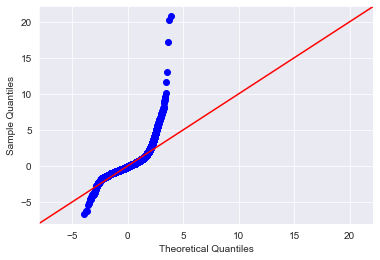

In [26]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [27]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

NameError: name 'train' is not defined

In [21]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 6
['view', 'waterfront', 'has_basement', 'is_cust_build', 'years_since_renovated']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-8.874e+05,1.16e+04,-76.580,0.0,-9.1e+05,-8.65e+05
view,7.411e+04,2458.312,30.145,0.0,6.93e+04,7.89e+04
waterfront,6.125e+05,2.2e+04,27.883,0.0,5.69e+05,6.56e+05
has_basement,8.453e+04,3467.739,24.376,0.0,7.77e+04,9.13e+04
is_cust_build,8.873e+05,2.52e+04,35.269,0.0,8.38e+05,9.37e+05


In [24]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

NameError: name 'train' is not defined